In [12]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

In [3]:
red = pd.read_csv(r'C:\Users\Carrie Minerich\Desktop\wine\wine.csv')
white = pd.read_csv(r'C:\Users\Carrie Minerich\Desktop\wine\winewhite.csv')

#### Already conducted EDA in previous notebook. Focus on Red wine dataset to start. Since quality is only output, let's divide it into 3 categories: poor, average, and excellent with a quantative value of 1-3 with 1 being poor and 3 being excellent

In [4]:
rating = []

for i in red['quality']:
    if i >=1 and i <=3:
        rating.append('1')
    if i >=4 and i <= 7:
        rating.append('2')
    if i >=8 and i <=10:
        rating.append('3')
        
red['rating'] = rating

In [6]:
red.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol ', 'quality', 'rating'],
      dtype='object')

In [13]:
Counter(red['rating'])

Counter({'2': 1571, '3': 18, '1': 10})

#### Split x and y variables. Quality or rating is the only y variable so index the dataframe for the x variables

In [14]:
x = red.iloc[:,:11] #exclude quality
y=red['rating']

In [15]:
x.head(10)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   
5            7.4              0.66         0.00             1.8      0.075   
6            7.9              0.60         0.06             1.6      0.069   
7            7.3              0.65         0.00             1.2      0.065   
8            7.8              0.58         0.02             2.0      0.073   
9            7.5              0.50         0.36             6.1      0.071   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                   11                    34   0.9978  3.51       0.56   
1                   25                    67   0.9968  3.20       0.68   
2                   15                    54   0.9970  3.26       0.65   
3                   17                    60   0.9980  3.16       0.58   
4                   11                    34   0.9978  3.51       0.56   
5                   13                    40   0.9978  3.51       0.56   
6                   15                    59   0.9964  3.30       0.46   
7                   15                    21   0.9946  3.39       0.47   
8                    9                    18   0.9968  3.36       0.57   
9                   17                   102   0.9978  3.35       0.80   

   alcohol   
0       9.4  
1       9.8  
2       9.8  
3       9.8  
4       9.4  
5       9.4  
6       9.4  
7      10.0  
8       9.5  
9      10.5

In [16]:
y.head(10)

0    2
1    2
2    2
3    2
4    2
5    2
6    2
7    2
8    2
9    2
Name: rating, dtype: object

#### Necessary to scale data due to difference in values/units. Going to run a PCA first to see max variance 

In [17]:
from sklearn.preprocessing import StandardScaler

In [19]:
ss = StandardScaler()
x = ss.fit_transform(x)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [20]:
print(x)

[[-0.52835961  0.96187667 -1.39147228 ...  1.28864292 -0.57920652
  -0.96024611]
 [-0.29854743  1.96744245 -1.39147228 ... -0.7199333   0.1289504
  -0.58477711]
 [-0.29854743  1.29706527 -1.18607043 ... -0.33117661 -0.04808883
  -0.58477711]
 ...
 [-1.1603431  -0.09955388 -0.72391627 ...  0.70550789  0.54204194
   0.54162988]
 [-1.39015528  0.65462046 -0.77526673 ...  1.6773996   0.30598963
  -0.20930812]
 [-1.33270223 -1.21684919  1.02199944 ...  0.51112954  0.01092425
   0.54162988]]


In [21]:
from sklearn.decomposition import PCA
pca = PCA()
x_pca = pca.fit_transform(x)

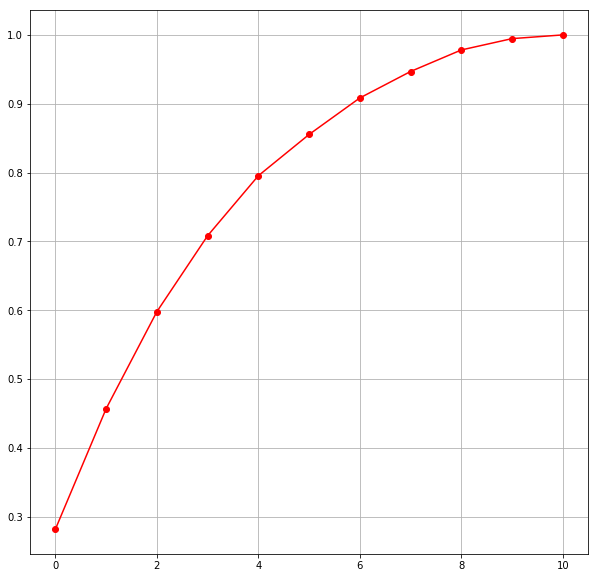

In [22]:
#plot pca to visualize
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.grid()

##### 7 components attribute for 90% of variance, 8 for 95% of variance. Pick first 7 for prediction. 

In [23]:
pca_new = PCA(n_components=7)
x_new = pca_new.fit_transform(x)

In [24]:
print(x_new)

[[-1.61954867  0.44998325 -1.77477009 ...  0.06720042 -0.91372142
  -0.16125746]
 [-0.79912197  1.85607296 -0.91266968 ... -0.01839316  0.93002674
  -1.00953205]
 [-0.74848022  0.88140718 -1.171901   ... -0.04354963  0.40158937
  -0.53949703]
 ...
 [-1.45606217  0.31222215  1.12395996 ...  0.19386791 -0.50613003
  -0.23103965]
 [-2.27043512  0.97999212  0.62730301 ...  0.06795916 -0.86007335
  -0.32151574]
 [-0.42696358 -0.53588399  1.62925743 ...  0.4504005  -0.49666014
   1.18893947]]


#### Split the data into a train and testing. Not doing k-folds cross validation right now

In [35]:
 from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size = 0.25)

In [36]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1199, 7)
(1199,)
(400, 7)
(400,)


#### Now that the data is split into a training and testing set, proceed with modeling. 

#### Basic complexity models first

#### Begin with supervised logistic regression. 

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

lr = LogisticRegression()
lr.fit(x_train, y_train)
lr_predict = lr.predict(x_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [38]:
lr_confmatrix = confusion_matrix(y_test, lr_predict)
lr_accuracy = accuracy_score(y_test, lr_predict)

print(lr_confmatrix)
print(lr_accuracy*100)

[[  0   2   0]
 [  0 391   0]
 [  0   7   0]]
97.75


##### 97.75% accuracy with logistic regression. 
##### LR relationship between features are weighted. Logistic function is often used to describe population growth, rises quickly then plateaus at a carrying capacity of the environment. Remember max-liklihood estimation, 

##### Confusion matrix: columns are predicted, rows are actual. so, columns are 1, 2, 3, and rows are 1, 2, 3. Majority of values in 2 so makes sense that majority of true positive are in the center, or 2 predicted 2 actual. 

##### Remember: 1: 10, 2: 1571, 3:18 total values then divided into a training set of 1199 and test of 400. We're only testing the first 7 values due to the variance we saw in PCA (fixed acidity, volatile acidity, citric acid, residual sugars, chlorides, free sulphur dioxide, and total sulphur dioxide). Density, pH, sulphate, and alcohol were excluded. There may not be any 1 in the test data...curious to see what is returned

In [39]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
dt_predict = dt.predict(x_test)

In [40]:
dt_confmatrix = confusion_matrix(y_test, dt_predict)
dt_accuracy = accuracy_score(y_test, dt_predict)

print(dt_confmatrix)
print(dt_accuracy*100)

[[  0   2   0]
 [  0 388   3]
 [  0   5   2]]
97.5


#### 97.5% accuracy with supervised Decision Tree. Slightly lower accuracy compared with LR however only a quarter of a percentage

#### Decision Tree is a binary tree with each node making decisions based on values of each feature. Classification and regression models

In [41]:
#NaiveBayes
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(x_train,y_train)
nb_predict=nb.predict(x_test)

In [42]:
#print confusion matrix and accuracy score
nb_confmatrix = confusion_matrix(y_test, nb_predict)
nb_accuracy = accuracy_score(y_test, nb_predict)
print(nb_confmatrix)
print(nb_accuracy*100)

[[  0   2   0]
 [  0 390   1]
 [  0   6   1]]
97.75


#### Naive bayes is 97.75% accuracy, same as LR.

##### Naive bayes is a supervised classification that is called naive because it assumes independence between features and assigns equal weight to features. It is a good classification to run because it is fast and stable. 

In [50]:
#KNN

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7) 
knn.fit(x_train, y_train)
knn_predict=knn.predict(x_test)


In [51]:
knn_confmatrix = confusion_matrix(y_test, nb_predict)
knn_accuracy = accuracy_score(y_test, nb_predict)
print(knn_confmatrix)
print(knn_accuracy*100)

[[  0   2   0]
 [  0 390   1]
 [  0   6   1]]
97.75


#### KNN accuracy is also 97.75%.

#### Final basic supervised model, KNN. Tried different k values, 7 and 40 (40 is the sqroot of 1599 and 7 for the number of variables, though a kfolds cross validation would help to better that).


In [43]:
#Random Forest

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train, y_train)
rf_predict=rf.predict(x_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [44]:
rf_confmatrix = confusion_matrix(y_test, rf_predict)
rf_accuracy = accuracy_score(y_test, rf_predict)
print(rf_confmatrix)
print(rf_accuracy*100)

[[  0   2   0]
 [  0 391   0]
 [  0   7   0]]
97.75


#### 97.75% accuracy with random forest model, same as Naive Bayes and Logistic Regression. 

#### Random Forest is an ensemble model. It is good for high variance problems. Averaging trees improves performance and controls overfitting (overfitting is when the model has learned the training data so well that the precision boundary is tight). 